# Teste 1 - Python

        Tentando importar e utilizar os dados do Ministério da Saúde em https://covid.saude.org.br para avaliar a situação divulgada oficialmente pelo MS

## Gráficos dos Dados

        Mostrar infectados e mortes confirmados diariamente
        Mostrar infectados e mortes confirmados acumulados
        Mostrar dados separados por região e por estado

## Estimativas (Regressão)
        
        Estimar próximos números (até 7 dias?) utilizando 2, 3 ou 4 (todos?) dias anteriores e regressão não linear
        
## Modelo de Contágio

        Utilizar dados adquiridos para rodar um modelo epidemiológico que utiliza valores de reprodução base e evolução da COVID-19, causada pelo vírus SARS-COV-2

In [108]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/4f4bc815e56dc052ccd547b877f56647_Download_COVID19_20200420.csv"

In [109]:
df = pd.read_csv(url, sep = ";")

df = df.loc[:, ['data', 'casosAcumulados', 'casosNovos']]

FMT = '%Y-%m-%d'

date = df['data']

df['data'] = date.map(lambda x : (datetime.strptime (x, FMT) - datetime.strptime("2020-01-30", FMT)).days )

#df


In [110]:
df = df.groupby("data").sum()

x = list(df.index)
y = list(df.iloc[:, 0])
y1 = list(df.iloc[:, 1])

df

,casosAcumulados,casosNovos
data,,
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0


In [115]:
def logistic_model (x, a, b, c) :
    return c/ (1 + np.exp ( - (x - b) / a))

logi_fit = curve_fit(logistic_model, x, y, p0 = [2, 100, 20000])
logi_fit1 = curve_fit(logistic_model, x, y1, p0 = [2, 100, 20000])

a = logi_fit[0][0]
b = logi_fit[0][1]
c = logi_fit[0][2]

a1 = logi_fit1[0][0]
b1 = logi_fit1[0][1]
c1 = logi_fit1[0][2]

logi_errors = [np.sqrt(logi_fit[1][i][i]) for i in [0, 1, 2]]

logi_sol = int(fsolve(lambda x : logistic_model(x, a, b, c) - int(c), b))
logi_sol1 = int(fsolve(lambda x : logistic_model(x, a1, b1, c1) - int(c1), b1))

logi_sol


164

In [116]:
def exponential_model (x, a, b, c) :
    return a * np.exp (b * (x - c))

exp_fit = curve_fit(exponential_model, x, y, p0 = [0.1, 0.1, 1])
exp_fit1 = curve_fit(exponential_model, x, y1, p0 = [0.1, 0.1, 1])

a = exp_fit[0][0]
b = exp_fit[0][1]
c = exp_fit[0][2]

a1 = exp_fit1[0][0]
b1 = exp_fit1[0][1]
c1 = exp_fit1[0][2]

exp_errors = [np.sqrt(exp_fit[1][i][i]) for i in [0, 1, 2]]

exp_sol = int(fsolve(lambda x : exponential_model(x, a, b, c) - int(c), b))
exp_sol

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


-344

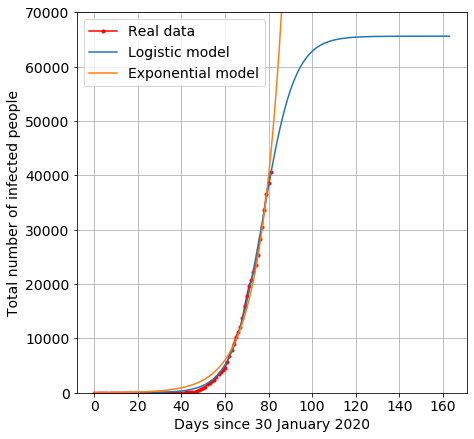

In [117]:
plt.grid(True)
plt.rc('font', size=14)
plt.rcParams['figure.figsize'] = [7, 7]

pred_x = list(range(max(x), logi_sol))

# Real data
plt.plot(x, y, marker = '.', label = "Real data", color="red")

# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,logi_fit[0][0],logi_fit[0][1],logi_fit[0][2]) for i in x+pred_x], label="Logistic model" )

# Predicted exponential curve
plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )

plt.legend()
plt.xlabel("Days since 30 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((0,70000))
plt.show()


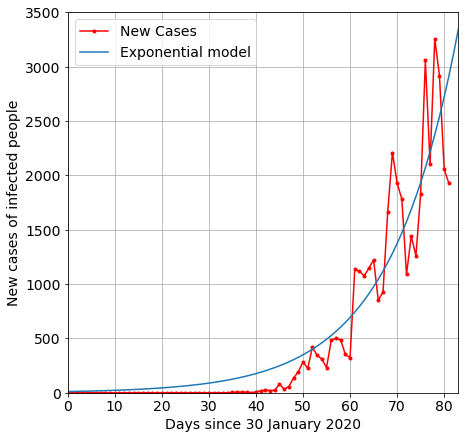

In [123]:
plt.grid(True)
plt.rc('font', size=14)
plt.rcParams['figure.figsize'] = [7, 7]

pred_x = list(range(max(x), logi_sol1))

plt.plot(x, y1, marker = '.', label = "New Cases", color="red")

# Predicted exponential curve
plt.plot(x+pred_x, [exponential_model(i,exp_fit1[0][0],exp_fit1[0][1],exp_fit1[0][2]) for i in x+pred_x], label="Exponential model" )

plt.legend()
plt.xlabel("Days since 30 January 2020")
plt.ylabel("New cases of infected people")
#plt.xlim((min(x) * 0.9, df.size * 1.1))
#plt.ylim((min(y1) * 0.9, c1 * 1.1))
plt.ylim(0, 3500)
plt.xlim(0, 83)
plt.show()